In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv('E:\Me\Google Capstone data\Divvy_Trips_2019_Q2.csv')
df2 = pd.read_csv('E:\Me\Google Capstone data\Divvy_Trips_2019_Q3.csv')
df3 = pd.read_csv('E:\Me\Google Capstone data\Divvy_Trips_2019_Q4.csv')
df4 = pd.read_csv('E:\Me\Google Capstone data\Divvy_Trips_2020_Q1.csv')

In [5]:
df1.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

In [7]:
df1.columns

Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

In [8]:
df2.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [9]:
df3.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [10]:
df4.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

There are some columns that do not exist in all dataframes so we will drop them.

In [11]:
df11 = df1.drop(columns=["01 - Rental Details Duration In Seconds Uncapped","05 - Member Details Member Birthday Year", 'Member Gender'])
df22 = df2.drop(['tripduration', 'birthyear', 'gender'],axis=1)
df33 = df3.drop(['tripduration', 'gender', 'birthyear'],axis=1)
df44 = df4.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1)

In [12]:
df11.columns

Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type'],
      dtype='object')

In [13]:
df22.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name', 'usertype'],
      dtype='object')

In [14]:
df33.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name', 'usertype'],
      dtype='object')

In [15]:
df44.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual'],
      dtype='object')

Rename df columns' name

In [16]:
df11.columns = ['ride_id', 'start_time', 'end_time', 'rideable_type', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'usertype']
df11.head(2)

,ride_id,start_time,end_time,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber


In [17]:
df22.columns = ['ride_id','start_time', 'end_time', 'rideable_type', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'usertype']
df22.head(2)

,ride_id,start_time,end_time,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer


In [18]:
df33.columns = ['ride_id', 'start_time', 'end_time', 'rideable_type', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'usertype']
df33.head(2)

,ride_id,start_time,end_time,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber


In [19]:
df44.columns = ['ride_id', 'rideable_type','start_time', 'end_time', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'usertype']
df44.head(2)

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,usertype
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,member


Concatenate 4 dataframes

In [20]:
df = pd.concat([df11,df22,df33,df44],ignore_index=True)

In [21]:
df.head()

,ride_id,start_time,end_time,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56.0,Desplaines St & Kinzie St,Subscriber
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59.0,Wabash Ave & Roosevelt Rd,Subscriber
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174.0,Canal St & Madison St,Subscriber
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133.0,Kingsbury St & Kinzie St,Subscriber
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129.0,Blue Island Ave & 18th St,Subscriber


In [22]:
df.describe()

,start_station_id,end_station_id
count,3.879822e+06,3.879821e+06
mean,2.028972e+02,2.037552e+02
std,1.571361e+02,1.571912e+02
min,1.000000e+00,1.000000e+00
25%,7.700000e+01,7.700000e+01
50%,1.740000e+02,1.740000e+02
75%,2.910000e+02,2.910000e+02
max,6.750000e+02,6.750000e+02


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879822 entries, 0 to 3879821
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   start_time          object 
 2   end_time            object 
 3   rideable_type       object 
 4   start_station_id    int64  
 5   start_station_name  object 
 6   end_station_id      float64
 7   end_station_name    object 
 8   usertype            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 266.4+ MB


Cleaning

In [24]:
df.columns

Index(['ride_id', 'start_time', 'end_time', 'rideable_type',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'usertype'],
      dtype='object')

Consolidate names for members and casual riders from 4 to 2 labels in 'usertype' column

In [25]:
df['usertype'].unique()

array(['Subscriber', 'Customer', 'member', 'casual'], dtype=object)

In [26]:
df.replace({'Subscriber': 'member', 'Customer': 'casual'}, inplace=True)
df['usertype'].unique()

array(['member', 'casual'], dtype=object)

Create ride_length column to calculate the duration of the ride

In [27]:
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_time'] = pd.to_datetime(df['start_time'])

In [28]:
df['ride_length'] = df['end_time']  - df['start_time']


In [29]:
df['ride_length'] = df['ride_length'].dt.total_seconds().div(60).astype(int)

In [30]:
df.isnull().sum()

ride_id               0
start_time            0
end_time              0
rideable_type         0
start_station_id      0
start_station_name    0
end_station_id        1
end_station_name      1
usertype              0
ride_length           0
dtype: int64

In [31]:
df['start_month'] = df['start_time'].dt.month

In [32]:
df['start_day'] = df['start_time'].dt.day

In [33]:
df['start_date'] = df['start_time'].dt.day_name()

In [42]:
df['start_hour'] = df['start_time'].dt.hour

In [34]:
df = df[df.ride_length>0]

In [43]:
df.head()

,ride_id,start_time,end_time,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,usertype,ride_length,start_month,start_day,start_date,start_hour
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56.0,Desplaines St & Kinzie St,member,7,4,1,Monday,0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59.0,Wabash Ave & Roosevelt Rd,member,17,4,1,Monday,0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174.0,Canal St & Madison St,member,4,4,1,Monday,0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133.0,Kingsbury St & Kinzie St,member,5,4,1,Monday,0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129.0,Blue Island Ave & 18th St,member,16,4,1,Monday,0


Descriptive Analysis

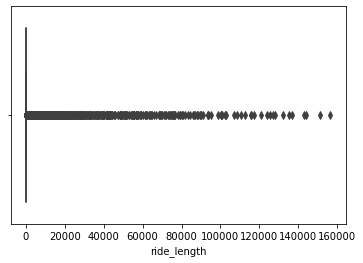

In [36]:
sns.boxplot(x=df['ride_length'])
plt.show()

In [ ]:
plt.hist(df['ride_length'],bins=32,log=True)

In [ ]:
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return q1,q3,iqr,lower_bound, upper_bound

In [ ]:
detect_outlier(df['ride_length'])

(6.0, 21.0, 15.0, -16.5, 43.5)

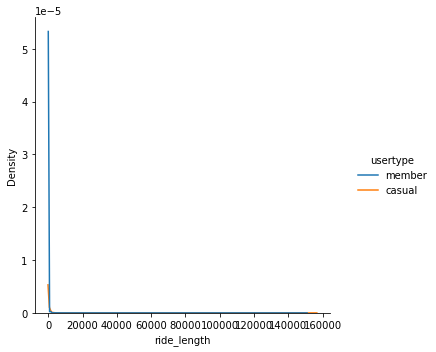

In [ ]:
sns.displot(data=df,x='ride_length',hue='usertype',kind='kde')

In [44]:
df_changed = df[df['ride_length']<43.5]

<AxesSubplot:xlabel='ride_length'>

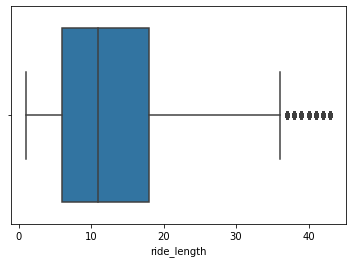

In [ ]:
sns.boxplot(data=df_changed,x='ride_length')

<AxesSubplot:xlabel='ride_length', ylabel='usertype'>

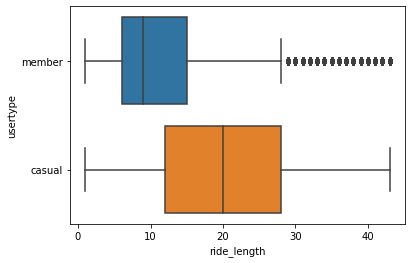

In [ ]:
sns.boxplot(data=df_changed,x='ride_length',y='usertype')

In [ ]:
print(df_changed.groupby('start_station_id').mean())

                  end_station_id  ride_length  start_month  start_day
start_station_id                                                     
1                       1.000000     9.000000     5.000000  21.000000
2                     131.188318    18.850815     7.171678  16.030526
3                     126.257102    21.643135     7.135731  15.515949
4                     178.501860    22.239517     6.866466  15.391654
5                     150.777547    12.473597     7.111573  15.411920
...                          ...          ...          ...        ...
670                   670.000000     3.500000     2.750000   7.250000
671                   373.157895    17.315789     7.631579  19.736842
672                   164.036736     9.837974     7.610402  15.595514
673                   201.793043    19.474715     8.267758  15.827243
675                   675.000000     5.000000     2.750000  13.000000

[618 rows x 4 columns]


<AxesSubplot:xlabel='start_station_id', ylabel='ride_length'>

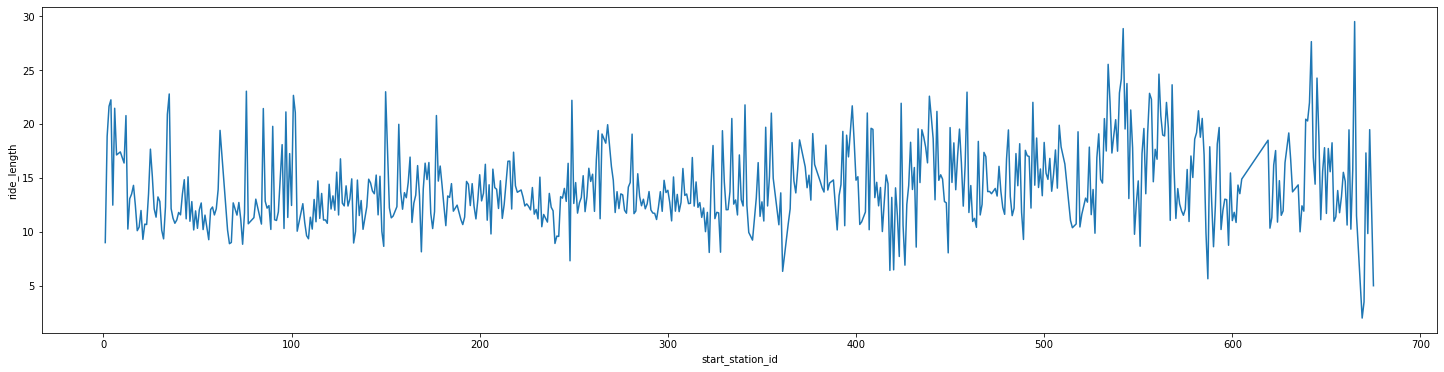

In [ ]:
plt.figure(figsize=(25,6))
sns.lineplot(data=df_changed.groupby('start_station_id').mean(),y='ride_length',x='start_station_id')

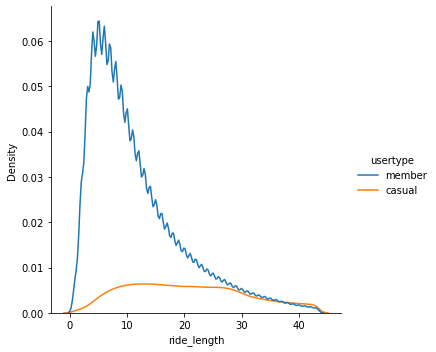

In [ ]:
sns.displot(data=df[df['ride_length']<43.5],x='ride_length',hue='usertype',kind='kde')

<AxesSubplot:xlabel='start_month', ylabel='ride_length'>

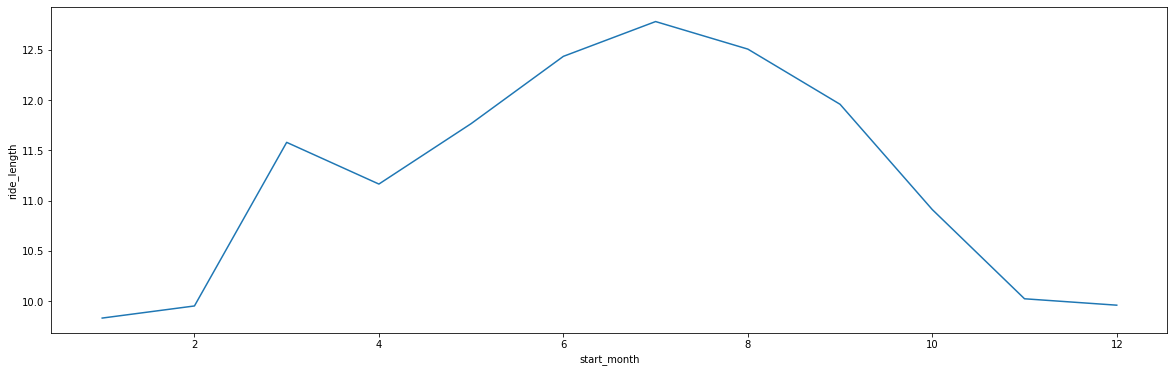

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_changed.loc[df['usertype']=='member'].groupby(['start_month']).mean(),y='ride_length',x='start_month')

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

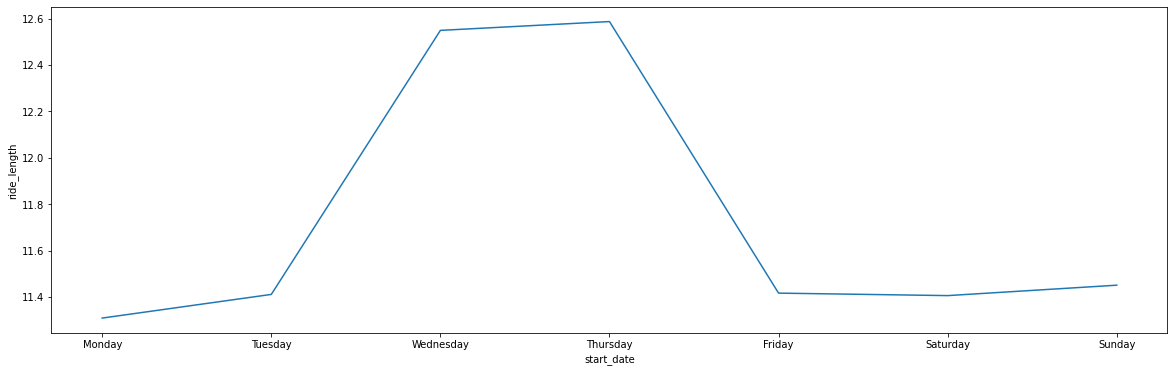

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=df_changed.loc[df['usertype']=='member'].groupby(['start_date']).mean(),y='ride_length',x='start_date')
ax.set_xticklabels(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

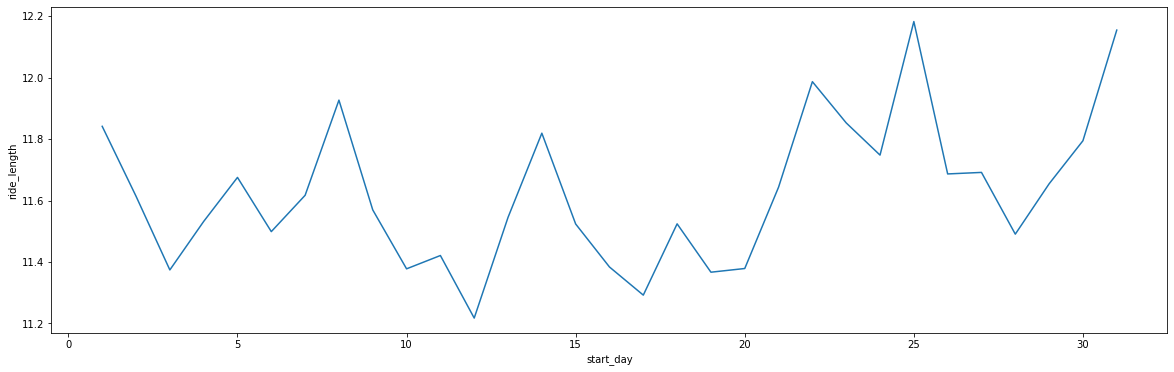

In [40]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=df_changed.loc[df['usertype']=='member'].groupby(['start_day']).mean(),y='ride_length',x='start_day')

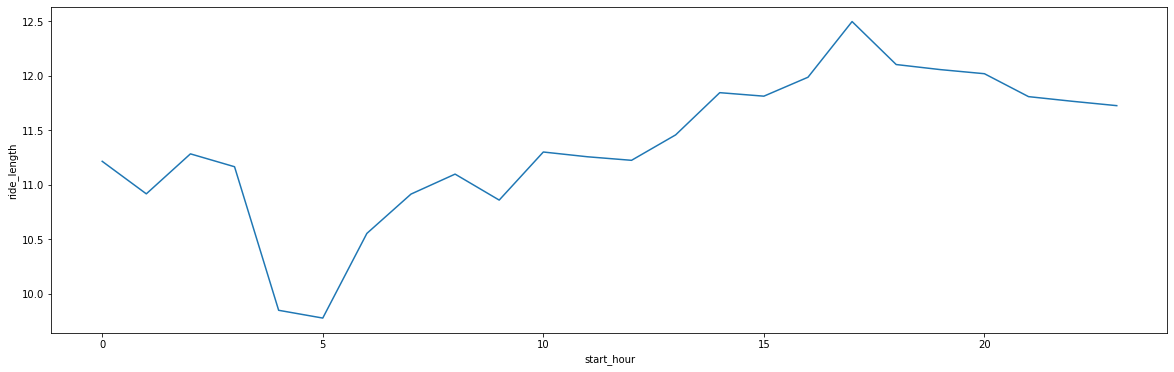

In [45]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=df_changed.loc[df['usertype']=='member'].groupby(['start_hour']).mean(),y='ride_length',x='start_hour')